### Importation des modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Affichage de l'ensemble des colonnes
pd.set_option('display.max_row', 111)
pd.set_option('display.max_columns',None)

### Lecture du fichier

In [3]:
DF = pd.read_csv('https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/87e3ec06-a99f-42bf-b292-074d02f31a94.csv',sep ='\t')
df = DF.copy()
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0


# ANALYSE EXPLORATOIRE

### Affichons les dimensions

In [4]:
df.shape

(2240, 29)

### Types des colonnes

In [5]:
df.dtypes.value_counts()

int64      25
object      3
float64     1
dtype: int64

### Affichage des variables qualitatives

In [6]:
df.select_dtypes(include = object)

,Education,Marital_Status,Dt_Customer
0,Graduation,Single,04-09-2012
1,Graduation,Single,08-03-2014
2,Graduation,Together,21-08-2013
3,Graduation,Together,10-02-2014
4,PhD,Married,19-01-2014
...,...,...,...
2235,Graduation,Married,13-06-2013
2236,PhD,Together,10-06-2014
2237,Graduation,Divorced,25-01-2014
2238,Master,Together,24-01-2014


In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Dépenses Global des client en fonction des autres parametres

In [8]:
list_depenses = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth' ]

In [9]:
df['total_d'] = df[list_depenses].sum(axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,total_d
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1649
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,38
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,801
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,67
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,446


#### Relation revenu vs dépenses du client

<AxesSubplot:xlabel='Income', ylabel='total_d'>

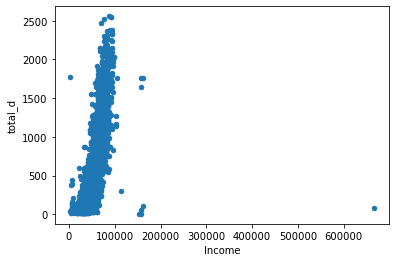

In [10]:
df.plot(kind='scatter', x='Income',y='total_d')

D'après le graphe ci-déssus, nous pouvons dire qu'il semble y avoir une corrélation linéaire entre la somme des dépenses éffectuées par les clients et leur revenu. On constate que les clients qui font le plus d'achats sont ceux qui ont un revenu élevés.

<AxesSubplot:ylabel='Complain'>

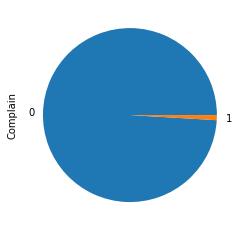

In [11]:
df['Complain'].value_counts().plot.pie()

#### Relation revenu vs plainte du client

<AxesSubplot:xlabel='total_d', ylabel='count'>

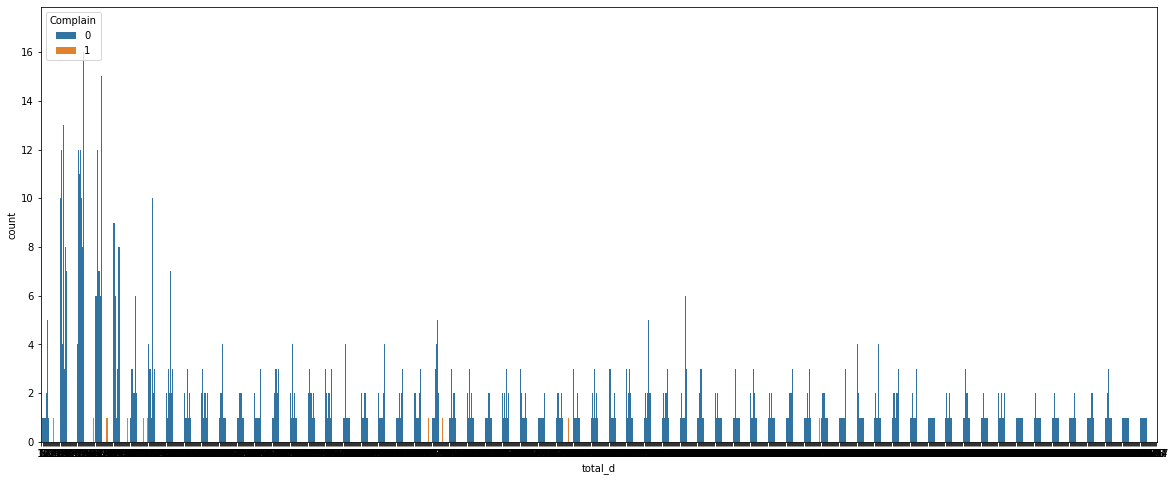

In [12]:
plt.figure(figsize=(20,8))
sns.countplot(hue='Complain', x='total_d', data=df)

On remarque sur cette figure que les clients qui se sont plaint au moins une au cours des deux dèrnière années sont ceux qui achètent le moins

#### Relation revenu vs dépenses du client

<AxesSubplot:xlabel='Education'>

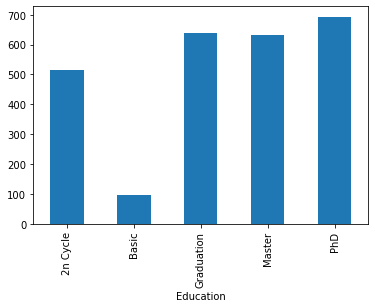

In [13]:
df.groupby(['Education'])['total_d'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Marital_Status'>

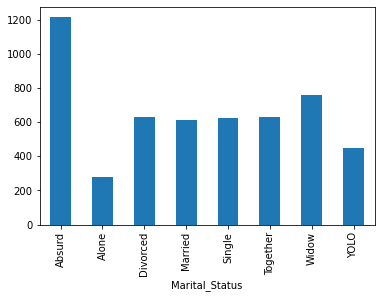

In [14]:
df.groupby(['Marital_Status'])['total_d'].mean().plot(kind='bar')

On constate que le niveau d'éducation des clients a un réel effet sur leurs achats. Les clients les plus éduqués sont ceux qui acchètent le plus.
De plus, les clients 'absurd' et les clients 'Widow' sont les plus gros acheteurs contrairement aux célibataires.

<AxesSubplot:xlabel='Income', ylabel='Density'>

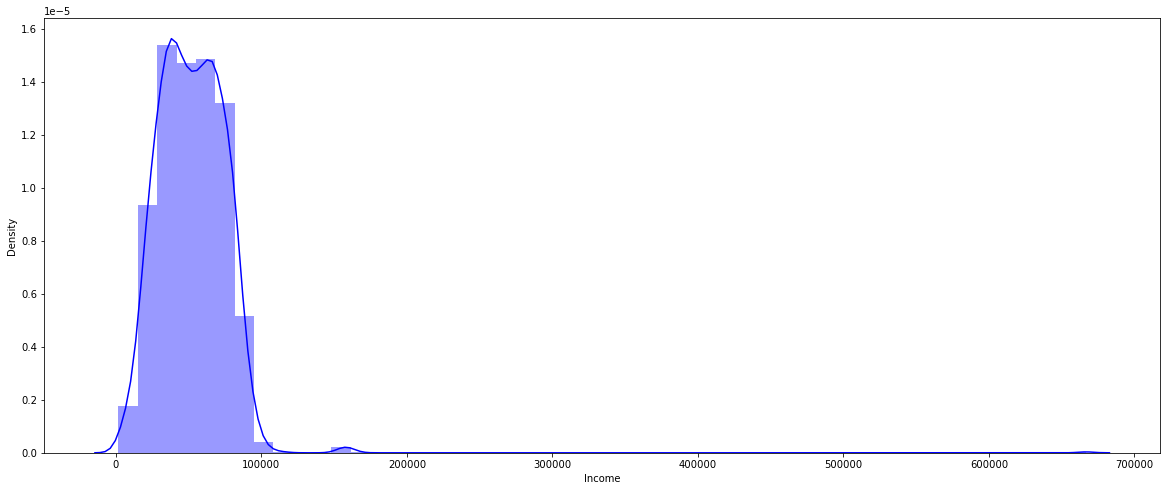

In [15]:
plt.figure(figsize=(20,8))
sns.distplot(df["Income"], color='blue')

In [19]:
#sns.pairplot(df.select_dtypes(exclude='object'), hue='Kidhome')

<AxesSubplot:>

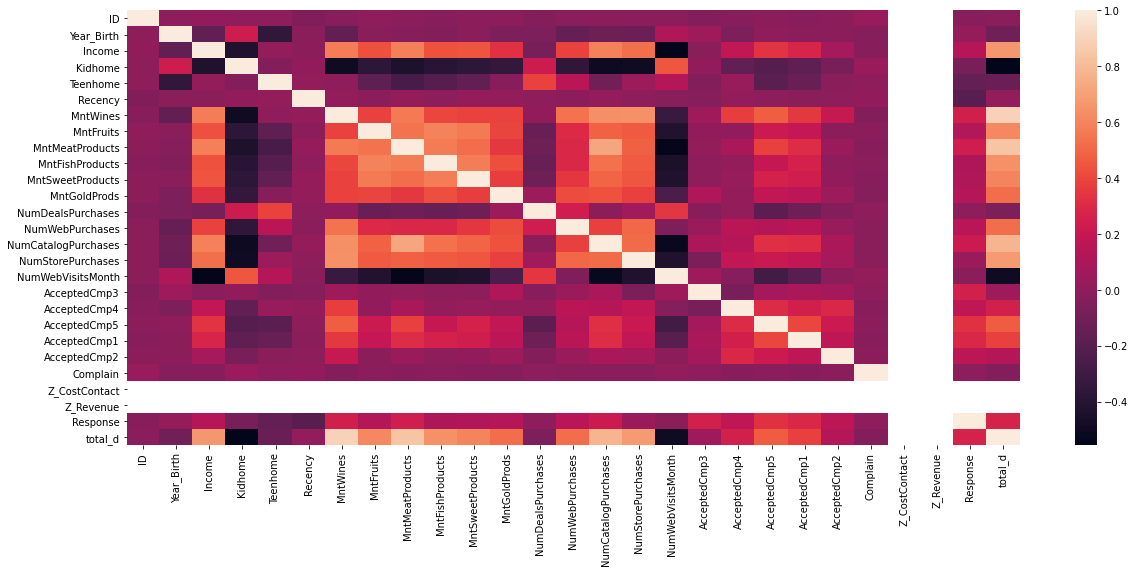

In [18]:
plt.figure(figsize=(20,8))
sns.heatmap(df.select_dtypes(exclude='object').corr())

### Vérification de l'existance de données manquantes 

In [ ]:
df.isna().sum().any()

### Proportion des données manquantes par colonnes (colonnes) 

In [ ]:
missing_rate = df.isna().sum()/df.shape[0]
missing_rate

In [ ]:
df['Income'].isna().sum()

Nous avons une seule variable qui comporte des données manquantes en proportion faible ( moins de 1% du dataset ).
Nous pouvons donc supprimer ces lignes sans affecter notre jeu de données.

### Suppression des données manquantes

In [ ]:
df = df.dropna()

### Vérification

In [ ]:
df.isna().sum().any()

In [ ]:
df.select_dtypes(include = object)

### Encodage des variables qualitatives 

In [ ]:
df['Education'].unique()

In [ ]:
df['Marital_Status'].unique()

In [ ]:
def encodage(df):
    code = {'Basic':0,
            '2n Cycle':1,
            'Graduation':2,
            'Master':3,
            'PhD' :4,}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df